## (K Nearest Neighbors, K-NN with classification) by Cover and Hart in 1967

The file has training samples for a binary classification problem with X = R² and Y = {0, 1}. The data is in the form of a .csv file with three columns:
1. Column 1: numeric attribute 1 (x1);
2. Column 2: numeric attribute 2 (x2);
3. Column 3: class (y).

Considering the k-NN classifier, plot the decision boundary in the interval [−1,1]² for k = 1, 3, 9, 27. What is your conclusion about the effect of the k value for the problem in question?

### Load the dataset from .CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
training = pd.read_csv("dados-ex1-1.csv")
training.columns = ['x1', 'x2', 'y']
training.head()

,x1,x2,y
0,0.146175,0.513381,1.0
1,-0.148257,-0.172509,1.0
2,0.376784,-0.046142,1.0
3,-0.093847,-0.511755,1.0
4,-0.443278,0.259939,1.0


In [3]:
X = np.array(training[['x1','x2']])
X[:5]

array([[ 0.14617501,  0.51338094],
       [-0.14825656, -0.1725091 ],
       [ 0.37678441, -0.04614202],
       [-0.09384735, -0.51175487],
       [-0.44327781,  0.2599386 ]])

In [14]:
label = np.array(list(x for x in training['y'])) # label column
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Viewing the training set points

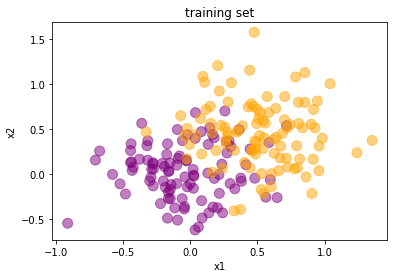

In [5]:
color = ['orange' if i == 0 else 'purple' for i in label]
plt.scatter(training['x1'], training['x2'], alpha=0.5, s=100, c=color)
plt.title('training set')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Visualize in 3D

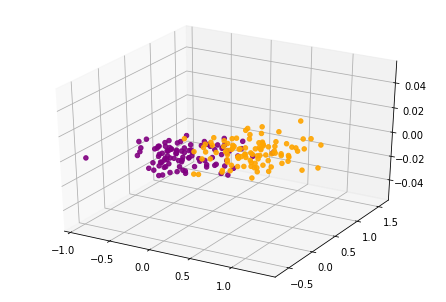

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
color = ['orange' if i == 0 else 'purple' for i in label]
ax.scatter(X[:,0], X[:,1],marker='o', c=color, alpha=0.9)

### Creating an artificial base in the interval between [-1, 1]²

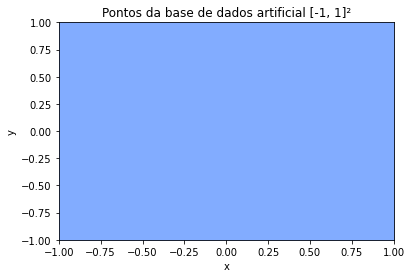

In [7]:
x = np.linspace(-1, 1, num = 100)
y = np.linspace(-1, 1, num = 100)
artificial_X = np.array(list((i, j) for i in x for j in y))

XX, YY = np.meshgrid(x, y)
plt.scatter(XX, YY, c='#82acff', alpha=0.5, s=100)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
plt.title('Pontos da base de dados artificial [-1, 1]²')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### K-NN

In [23]:
class KNN():
    def __init__(self, K, features, label, artificial_X, XX, YY):
        self.k = K
        self.X = features
        self.y = label
        self.feature_test = artificial_X
        self.XX = XX
        self.YY = YY
        
    def euclidean_distance(self, vector_one, vector_two):
        summation = 0
        for i in range(len(vector_one)):
            summation += (vector_one[i] - vector_two[i]) ** 2
        distance = np.sqrt(summation)
        return distance
    
    # Find label of the indices v1, ... , vk of the smallest elements 
    def find_label_smallest_element(self, distance_array, k_len):
        label_neighbor = []
        index_min_dist = np.argpartition(distance_array, k_len)
        label_neighbor = self.y[index_min_dist[:k_len]]
        return list((x) for x in label_neighbor)
    
    # Compute distances between dataset and artificial base
    def get_distance(self, x_test):
        neighbor_distance = []
        for neighbor in self.X:
            neighbor_distance.append(self.euclidean_distance(x_test, neighbor))
        return neighbor_distance
    
    # Training K-NN
    def fit(self, k):
        hypothesis = []
        
        for x_test in self.feature_test:
            neighbor_distance = self.get_distance(x_test)
            label_neighbors = self.find_label_smallest_element(neighbor_distance, k)
            hypothesis.append(max(set(label_neighbors), key=label_neighbors.count))
            
        return hypothesis
    
    def plot_decision_boundary(self, k, hypothesis):
        color = ['#fffcab' if i == 0.0 else '#fa86be' for i in hypothesis]
        plt.scatter(self.feature_test[:, 0], self.feature_test[:, 1], c=color)
        plt.xlim(XX.min(), XX.max())
        plt.ylim(YY.min(), YY.max())
        plt.title('knn with k = {}'.format(self.k))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
    

### Instantiating, training and visualize decision boundary between [-1, 1]² for k = 1

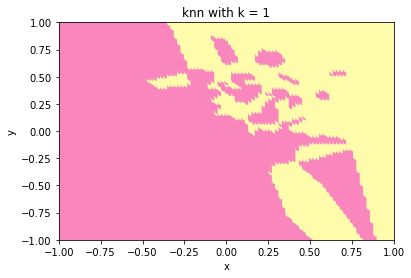

In [24]:
k = 1
knn = KNN(k, X, label, artificial_X, XX, YY)

hypothesis = knn.fit(k)
knn.plot_decision_boundary(k, hypothesis)

### Instantiating, training and visualize decision boundary between [-1, 1]² for k = 3

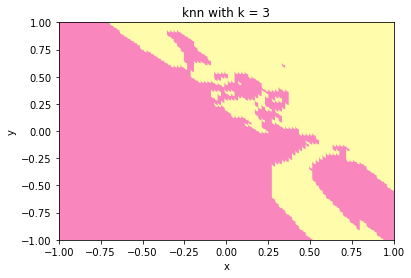

In [25]:
k = 3
knn = KNN(k, X, label, artificial_X, XX, YY)

hypothesis = knn.fit(k)
knn.plot_decision_boundary(k, hypothesis)

### Instantiating, training and visualize decision boundary between [-1, 1]² for k = 9

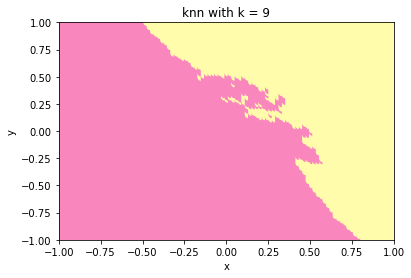

In [26]:
k = 9
knn = KNN(k, X, label, artificial_X, XX, YY)

hypothesis = knn.fit(k)
knn.plot_decision_boundary(k, hypothesis)

### Instantiating, training and visualize decision boundary between [-1, 1]² for k = 27

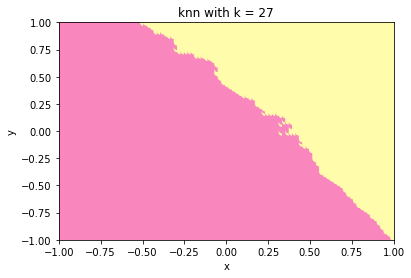

In [27]:
k = 27
knn = KNN(k, X, label, artificial_X, XX, YY)

hypothesis = knn.fit(k)
knn.plot_decision_boundary(k, hypothesis)

### Conclusion

In this jupyter, we saw how to implement the k-NN classifier algorithm using an artificial dataset. Also we saw that the results were interesting and when we increase the k value, in (1, 3, 9, 27 odd numbers), the decision boundary becomes more separable. The decision boundary stayed more smooth with k equals to 27 almost as it could be divided by a straight line.